In [6]:
import rdkit
from rdkit.Chem import AllChem
import pandas as pd
import os
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit import Chem
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [7]:
import json
with open('/home/datahouse1/caoduanhua/MolGens/SelfConstructedBenchmark/crossdock2020_duplicated_uniprotId_map_smiles_in_trainset.json','r') as f:
    crossdock2020_duplicated_uniprotId_map_smiles_in_trainset = json.load(f)

In [8]:

def get_trainset_scaffold(x,ref_map):
    uniprot_id  = x['UniprotID']
    if uniprot_id not in ref_map:
        return []
    else:
        all_find_scaffold = [i[1:-1] for i in x.Finded_Scaffolds[1:-1].split(', ')]
        all_find_scaffold = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in all_find_scaffold if i != '']
        ref_scaffolds = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in ref_map[uniprot_id]['scaffold'] if i != '']
        list_dup_scaffolds = list(set(all_find_scaffold).intersection(set(ref_scaffolds)))
        return list_dup_scaffolds
def get_trainset_smiles(x,ref_map):
    uniprot_id  = x['UniprotID']
    if uniprot_id not in ref_map:
        return []
    else:
        all_find_smiles = [i[1:-1] for i in x.Finded_Smiles[1:-1].split(', ')]
        all_find_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in all_find_smiles if i != '']
        ref_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in ref_map[uniprot_id]['smiles'] if i != '']
        list_dup_smiles = list(set(all_find_smiles).intersection(set(ref_smiles)))
    
        return list_dup_smiles
# merged_result_pd['smilesInTrainset'] = merged_result_pd.apply(lambda x: get_trainset_smiles(x,crossdock2020_duplicated_uniprotId_map_smiles_in_trainset),axis = 1)

In [9]:
all_result_path = '/home/datahouse1/caoduanhua/MolGens/SelfConstructedBenchmark/AnalysisResults/molecule_scaffold_recovery'
all_results = os.listdir(all_result_path)
all_results_pd = []

for temp_path in all_results:
    model_name = os.path.splitext(temp_path)[0]
    temp_path = os.path.join(all_result_path, temp_path)
    temp_pd = pd.read_csv(temp_path)
    temp_pd['ModelName'] = [model_name]*len(temp_pd)
    
    temp_pd['FindedScaffoldIsInTrainset'] = temp_pd.apply(lambda x :len(get_trainset_scaffold(x, crossdock2020_duplicated_uniprotId_map_smiles_in_trainset)), axis=1)
    temp_pd['FindedSmilesIsInTrainset'] = temp_pd.apply(lambda x :len(get_trainset_smiles(x, crossdock2020_duplicated_uniprotId_map_smiles_in_trainset)), axis=1)
    all_results_pd.append(temp_pd)


In [10]:
# temp_pd
# all_results_pd

In [11]:
merged_result_pd = pd.concat(all_results_pd,axis = 0)#['ModelName'].value_counts()

In [12]:
merged_result_pd['Dupliceted_UniprotID'] = merged_result_pd['UniprotID'].apply(lambda x: x in crossdock2020_duplicated_uniprotId_map_smiles_in_trainset)

In [13]:
merged_result_pd

,Unnamed: 0,UniprotID,Reference_Smiles,Generated_Smiles,Reference_Smiles_num,Finded_Smiles,Finded_Smiles_Num,Reference_Scaffolds,Reference_Scaffolds_Num,Generated_Scaffolds,Generated_Scaffolds_Num,Finded_Scaffolds,Finded_Scaffolds_Frequency,Finded_Scaffolds_Frequency_Rate,Finded_Scaffolds_Num,Finded_Scaffolds_Rate,ModelName,FindedScaffoldIsInTrainset,FindedSmilesIsInTrainset,Dupliceted_UniprotID
0,0,P53779,['CS(=O)(=O)Nc1ccc(-c2cnc3cccc(Nc4ccc(Cl)cn4)c...,"['Fc1cc(NC2CCCCC2)ccc1[NH+:1]=[O:1]', 'Cc1cc(B...",1041,[],0,"['O=C(CSc1nc2nncc-2cn1-c1ccccc1)Nc1cc[nH]n1', ...",563,"['', 'C1=C[C@:1]23C=CC=N[C@@:1]2(C=C1)[CH:1]=[...",127,['c1ccccc1'],18,0.095238,1,0.001776,FLAG,0,0,False
1,1,P28845,['O=C(c1ccc(C(F)(F)F)cc1)N1CCC(n2c(=O)[nH]c3cc...,['CC(=O)[C@@H](C)[C@@]1(O)[C@H](C)O[C@:1]2([C@...,3275,[],0,"['O=C(NC1CCCCC1)c1cnn(-c2ccccc2)c1', 'O=C(CC1C...",1281,"['', 'c1cn(C2CCCCC2)cn1', 'c1n[c:1]2[c:1](n1C1...",40,['c1ccccc1'],4,0.066667,1,0.000781,FLAG,0,0,True
2,2,Q9H2K2,['COc1cc2ncnc(N3CCC(CN4Cc5ccccc5NC4=O)CC3)c2cc...,['CN(C)S(C)(=O)(c1ccccc1)N(C)[S:1][NH:1][CH3:2...,681,[],0,['O=C(c1ccccc1)C1CCN(CC(=O)N(Cc2nc3c(c(=O)[nH]...,324,"['', 'c1ccc(O[C@@H:1]2[CH2:1][CH2:1][CH2:1][CH...",55,[],0,0.000000,0,0.000000,FLAG,0,0,True
3,3,P41145,['CN(C(=O)Cc1cccc2sccc12)[C@@H]1CCCCC[C@H]1N1C...,['CC1=C[C@@:1]2(N3CCCC3)[CH:1]=[C:1](C)[NH:1][...,3853,[],0,"['', 'c1ccc(CCC2CCCCN2Cc2cncs2)cc1', 'O=C(Nc1c...",1788,"['', 'c1cncc(-[c:1]2[cH:1][cH:1][n:1][cH:1][n:...",112,"['', 'c1ccccc1']",15,0.102041,2,0.001119,FLAG,0,0,True
4,4,O14757,['CCn1c(=O)c2c(C)[nH]nc2c2cc3c(cc21)CN(C(=O)NC...,"['Cc1c(Cl)c(N)c2cn[c:1]([Cl:1])nc2c1CO', 'Cc1c...",1950,[],0,['O=C1NC(=O)c2c1c(-c1ccccc1)cc1c2c2ccccc2n1CC[...,923,"['', 'O=c1c[cH:1]c2ncc(-c3cscn3)cc2[nH]1', 'O=...",163,[],0,0.000000,0,0.000000,FLAG,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,P05979,['COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn...,"['CN(C)c1ccc(CCO)cc1', 'OCCc1ccc(CO)o1', 'CCO[...",689,[],0,"['', 'O=C(Cc1ccccc1Nc1ccccc1)OCc1cc(=O)n(-c2cc...",274,"['', 'O=C1CCCCCN1', 'O=C1CC[C@@H](c2ccccc2)C1'...",390,"['', 'c1ccc(-c2ccccc2)cc1', 'c1ccc(-c2nncs2)cc...",353,0.404353,11,0.040146,DecompDiff,4,0,True
107,107,P08581,['C[C@@H](Oc1c[nH]c(=O)c(C(=O)Nc2ccccc2)c1)c1c...,"['CCCCC[C@H](C)CCC[C@@H]1CCCNC1=O', 'CCCN1c2cc...",3496,[],0,"['c1cc(NCc2cccc3nonc23)c2cc(N3CCNCC3)cnc2c1', ...",1469,"['', 'O=C1N=C[C@H]2CC3CCCN4CN[C@H](C12)C34', '...",554,['c1ccccc1'],79,0.084222,1,0.000681,DecompDiff,0,0,False
108,108,O60885,"['CCc1c(NCc2ccccc2N2CCN(C)CC2)cnn(C)c1=O', 'CC...","['CC[C@@H](C)NC(C)=O', 'CC(C)Oc1ccccc1N=C1C[C@...",3870,[],0,"['c1ccc(N[C@@H]2CCNc3ccccc32)cc1', 'c1ccc(Cc2c...",1738,"['', 'C=C1COCO1', 'C1=NC=C(CC2CCCC2)C1', 'O=C1...",263,['c1ccccc1'],79,0.099496,1,0.000575,DecompDiff,1,0,True
109,109,P43490,['O=C(Nc1ccc(C(=O)N2CC3COCC3C2)cc1)N1Cc2ccccc2...,['C=C[C@@H]1C=CN[C@@H](CO)[C@@H]2[C@H](COC)ON2...,2364,[],0,['O=C(Nc1ccc(C(=O)N2CC3COCC3C2)cc1)N1Cc2ccccc2...,1229,"['', 'C=C1CCC2C=CC3C[C@H]4C[C@H]4O[C@@H]3CC2C1...",379,[],0,0.000000,0,0.000000,DecompDiff,0,0,True


In [14]:
merged_result_pd[merged_result_pd['FindedScaffoldIsInTrainset']!=0]

,Unnamed: 0,UniprotID,Reference_Smiles,Generated_Smiles,Reference_Smiles_num,Finded_Smiles,Finded_Smiles_Num,Reference_Scaffolds,Reference_Scaffolds_Num,Generated_Scaffolds,Generated_Scaffolds_Num,Finded_Scaffolds,Finded_Scaffolds_Frequency,Finded_Scaffolds_Frequency_Rate,Finded_Scaffolds_Num,Finded_Scaffolds_Rate,ModelName,FindedScaffoldIsInTrainset,FindedSmilesIsInTrainset,Dupliceted_UniprotID
17,17,P49841,"['c1cc2[nH]ncc2cc1-c1cc(CN2CCCCC2)no1', 'COCCn...",['CC1=C[C@:1]23C(O)=NC(Cl)=C[C@@:1]2(O1)[N:1]=...,2592,[],0,"['', 'O=C(NCCCc1ccccc1)c1cccc2[nH]c(-c3ccccc3)...",1141,['C1=C[C@@]23C=C[CH:1]=N[C@]2(N=C1)C1=C(OCO1)C...,171,"['c1ccccc1', 'c1ccc2ncccc2c1']",8,0.039801,2,0.001753,FLAG,1,0,True
24,24,Q14145,['CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCC(=O)O)...,['CN[C@H]1COC[C@H](S)[C@@:1]12[O:1][C:1]1([C@@...,283,[],0,['O=C1OC[C@@H](NC(=O)[C@@H]2CCCN2C(=O)c2ccon2)...,130,"['', 'O=C(NC1CCCCC1)N1CCCCC1', 'c1cnc2[nH][c:1...",59,['c1ccccc1'],10,0.112360,1,0.007692,FLAG,1,0,True
26,26,P00734,['CNCCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc...,['O=C1CC[C@H]([NH2+]C2CCCCC2)C[C@]1(O)N[S@H:1]...,4198,[],0,"['', 'O=C(NC1CCCC1)C(Cc1ccccc1)NS(=O)(=O)c1ccc...",1877,"['', 'c1ccc([S:1](O[NH2+]C2CC2)=[O:2])cc1', 'C...",22,"['', 'C1CCNCC1']",3,0.125000,2,0.001066,FLAG,1,0,True
29,29,Q02127,"['Cc1ccc(Nc2cnc(-c3ccccc3Cl)nc2)c(C(=O)O)c1', ...",['C[C@@H]([C@H](C(F)(F)F)[C@@H:1]([NH3+:1])[CH...,983,[],0,['O=C(Nc1ccccc1)c1ccc(-n2nc[nH]c2=O)nc1OC1CCOC...,302,"['', 'C1CC[C@H:1]2[CH2:1][CH2:1][C@H:1](C3CC3)...",28,['c1ccccc1'],6,0.146341,1,0.003311,FLAG,1,0,True
34,34,P68400,['COc1ccc(C(=O)O)cc1Nc1nc(-c2ccc3ccccc3c2)cs1'...,['CP[C@H](C)[P@:1](=O)([C@@](C)(O)NS)[CH2:1][C...,617,[],0,"['c1cc2cc(c1)-c1cnn3ccc(nc13)NCCOCCO2', 'O=C(N...",277,"['', 'C1=Nc2ccccc2[CH:1]2[CH:1]=[CH:1][NH:1][C...",137,['c1ccccc1'],2,0.013423,1,0.003610,FLAG,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,P08254,['CCCCCCNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C...,['C[C@@H](C(N)=O)[C@H]1[C@@H](CO)[C@@H](O)CCC[...,1752,[],0,"['', 'O=c1c2ccccc2nnn1CCCCSc1ccc(-c2ccccc2)cc1...",785,"['', 'O=C1NCCCCc2ccccc21', 'C1CC[C@@]23C[C@@H]...",281,"['', 'c1ccc2c(c1)CCC2', 'c1ccc(-c2ccccc2)cc1',...",369,0.484252,13,0.016561,DecompDiff,3,0,True
100,100,Q03181,['CCOc1ccc(-c2ccc(CCCc3nn(-c4ccc(C(F)(F)F)cc4)...,['CO[C@@H]1C=C=CC2=C(F)C[C@@H]3C(=O)C[C@@H]4[C...,1075,[],0,"['', 'c1ccc(NCc2ccc(OCc3conc3-c3ccccc3)cc2)cc1...",371,"['', 'O=S(NCCC1N=C2C=CC=CC=C2S1)c1cccnc1', 'C=...",662,"['', 'O=C(NCc1ccccc1)c1ccccc1', 'c1ccc(OCc2ccc...",54,0.066832,3,0.008086,DecompDiff,1,0,True
101,101,P78536,['CC#CCOc1ccc(S(=O)(=O)C(C(=O)NO)c2ccc(OC)cc2)...,"['CNc1cccc(C2CC(Cl)C[C@@H](OC)O2)c1', 'COC[C@@...",1521,[],0,"['', 'O=S1(=O)NCCNc2ccccc21', 'O=S(=O)(CCC1CCC...",655,"['', 'C1=CCC([C@@H]2C=CCCC2)=CC1', 'C1=C[C@@H]...",637,"['', 'C1CCCC1', 'c1ccsc1', 'c1ccc(-c2ccccc2)cc...",84,0.112903,13,0.019847,DecompDiff,1,0,True
106,106,P05979,['COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn...,"['CN(C)c1ccc(CCO)cc1', 'OCCc1ccc(CO)o1', 'CCO[...",689,[],0,"['', 'O=C(Cc1ccccc1Nc1ccccc1)OCc1cc(=O)n(-c2cc...",274,"['', 'O=C1CCCCCN1', 'O=C1CC[C@@H](c2ccccc2)C1'...",390,"['', 'c1ccc(-c2ccccc2)cc1', 'c1ccc(-c2nncs2)cc...",353,0.404353,11,0.040146,DecompDiff,4,0,True


Text(0, 0.5, 'Number of Taregts')

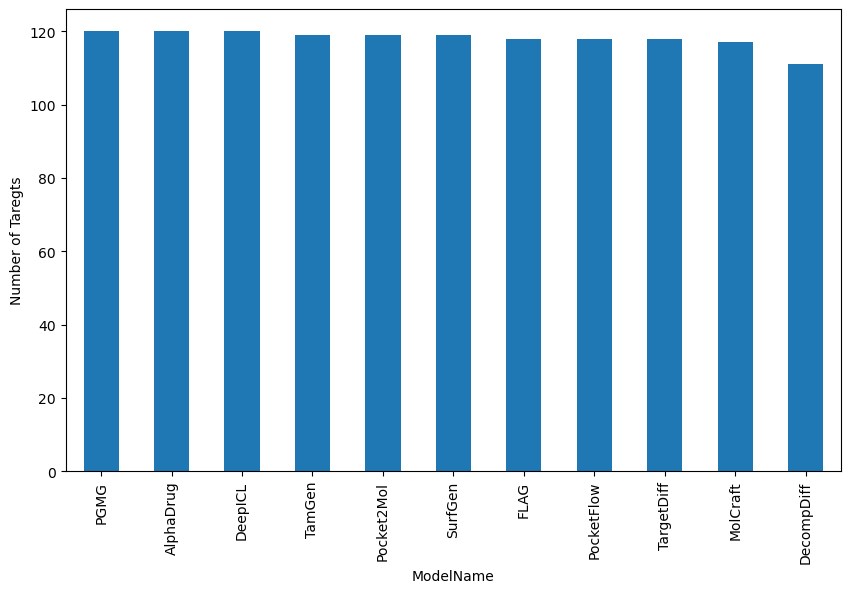

In [15]:
plt.figure(figsize=(10,6))
merged_result_pd['ModelName'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Taregts')
# plt.title('Number of targets successful generated molecules by different model')

In [16]:
merged_result_pd['Finded_Smiles_Hit_Rate(%)'] = merged_result_pd['Finded_Smiles_Num'].apply(lambda x: x/10)
merged_result_pd['Finded_Scaffold_Hit_Rate(%)'] = merged_result_pd['Finded_Scaffolds_Num'].apply(lambda x: x/10)

scaffold_molecule_pd = merged_result_pd.groupby('ModelName')[['Finded_Smiles_Hit_Rate(%)','Finded_Scaffold_Hit_Rate(%)']].agg(np.mean).reset_index()#.apply(lambda x: sum(x)/120,axis = 1).plot(kind = 'bar',figsize=(10,6))


# sacffold_molecule_pd = merged_result_pd.groupby('ModelName').agg(list)[['Finded_Smiles_Num','Finded_Scaffolds_Num']].reset_index()

# scaffold_molecule_pd['Mean_Finded_Scaffolds_Num'] = scaffold_molecule_pd['Finded_Scaffolds_Num'].apply(lambda x: sum(x)/120)



# scaffold_molecule_pd['Mean_Finded_Smiles_Num'] = scaffold_molecule_pd['Finded_Smiles_Num'].apply(lambda x: sum(x)/120)
# #  统计找到骨架和找到分子的靶点数目
# scaffold_molecule_pd['Number_of_Finded_Scaffolds'] = scaffold_molecule_pd['Finded_Scaffolds_Num'].apply(lambda x: np.sum(np.array(x, dtype=bool)))
# scaffold_molecule_pd['Number_of_Finded_Smiles'] = scaffold_molecule_pd['Finded_Smiles_Num'].apply(lambda x: np.sum(np.array(x, dtype=bool)))


# # 统计找到的骨架在训练集中的比例
# scaffold_molecule_pd['FindedScaffoldIsInTrainset'] = merged_result_pd.groupby('ModelName').agg(list)['FindedScaffoldIsInTrainset'].apply(lambda x: np.sum(np.array(x, dtype=bool)))
# # 统计找到的分子在训练集中的比例
# scaffold_molecule_pd['FindedSmilesInTrainset'] = merged_result_pd.groupby('ModelName').agg(list)['FindedSmilesInTrainset'].apply(lambda x: np.sum(np.array(x, dtype=bool)))

/tmp/ipykernel_2846259/1811524437.py:4: FutureWarning: The provided callable <function mean at 0x7f75aa8be980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  scaffold_molecule_pd = merged_result_pd.groupby('ModelName')[['Finded_Smiles_Hit_Rate(%)','Finded_Scaffold_Hit_Rate(%)']].agg(np.mean).reset_index()#.apply(lambda x: sum(x)/120,axis = 1).plot(kind = 'bar',figsize=(10,6))


In [17]:
scaffold_molecule_pd.dropna()

,ModelName,Finded_Smiles_Hit_Rate(%),Finded_Scaffold_Hit_Rate(%)
0,AlphaDrug,0.006667,0.029167
1,DecompDiff,0.002703,0.436036
2,DeepICL,0.000000,0.039167
3,FLAG,0.000000,0.147458
4,MolCraft,0.007692,0.457265
5,PGMG,0.004167,0.275000
6,Pocket2Mol,0.000000,0.296639
7,PocketFlow,0.002542,0.565254
8,SurfGen,0.003361,0.115126
9,TamGen,0.048739,0.344538


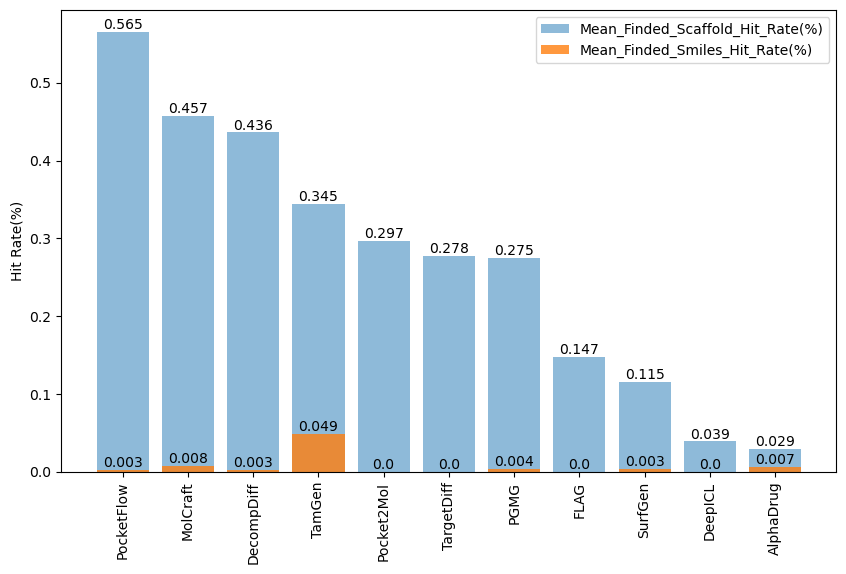

In [23]:
scaffold_molecule_pd = scaffold_molecule_pd.sort_values(by = 'Finded_Scaffold_Hit_Rate(%)',ascending = False)
plt.figure(figsize=(10,6))
bars1 = plt.bar(scaffold_molecule_pd['ModelName'],scaffold_molecule_pd['Finded_Scaffold_Hit_Rate(%)'],label = 'Mean_Finded_Scaffold_Hit_Rate(%)',alpha = 0.5)
bars2 = plt.bar(scaffold_molecule_pd['ModelName'],scaffold_molecule_pd['Finded_Smiles_Hit_Rate(%)'],label = 'Mean_Finded_Smiles_Hit_Rate(%)',alpha = 0.8)
# scaffold_molecule_pd[['Number_of_Finded_Scaffolds']].plot(kind = 'bar',xlabel = 'ModelName',ylabel = 'Number of Targets',label = 'Number of Finded Scaffolds')
# scaffold_molecule_pd[['Number_of_Finded_Smiles']].plot(kind = 'bar',label = 'Number of Finded Smiles')
_ = plt.xticks(range(len(scaffold_molecule_pd['ModelName'])),scaffold_molecule_pd['ModelName'],rotation = 90)
# 在柱子上添加具体数值

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{float(round(height,3))}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    # 小数点保留三位
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{float(round(height,3))}', ha='center', va='bottom')
plt.ylabel('Hit Rate(%)')
plt.legend()

### 去除crossdock见过的蛋白


In [24]:
import json
with open('/home/datahouse1/caoduanhua/MolGens/SelfConstructedBenchmark/UniprotIDs_duplicated_with_crossdock2020.json','r') as f:
    UniprotId_in_crossdock = json.load(f)
# dict(Counter(duplicated_uniprot_ids))

In [32]:
scaffold_deduplicated_pd = merged_result_pd[~merged_result_pd['UniprotID'].isin(UniprotId_in_crossdock.keys())]
scaffold_deduplicated_pd['Finded_Smiles_Hit_Rate(%)'] = scaffold_deduplicated_pd['Finded_Smiles_Num'].apply(lambda x: x/10)
scaffold_deduplicated_pd['Finded_Scaffold_Hit_Rate(%)'] = scaffold_deduplicated_pd['Finded_Scaffolds_Num'].apply(lambda x: x/10)

scaffold_deduplicated_pd = scaffold_deduplicated_pd.groupby('ModelName')[['Finded_Smiles_Hit_Rate(%)','Finded_Scaffold_Hit_Rate(%)']].agg(np.mean).reset_index()#.apply(lambda x: sum(x)/120,axis = 1).plot(kind = 'bar',figsize=(10,6))



/tmp/ipykernel_2846259/1847235968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaffold_deduplicated_pd['Finded_Smiles_Hit_Rate(%)'] = scaffold_deduplicated_pd['Finded_Smiles_Num'].apply(lambda x: x/10)
/tmp/ipykernel_2846259/1847235968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaffold_deduplicated_pd['Finded_Scaffold_Hit_Rate(%)'] = scaffold_deduplicated_pd['Finded_Scaffolds_Num'].apply(lambda x: x/10)
/tmp/ipykernel_2846259/1847235968.py:5: FutureWarning: The provided callable <function 

In [33]:
# scaffold_deduplicated_pd['UniprotID'].value_counts()

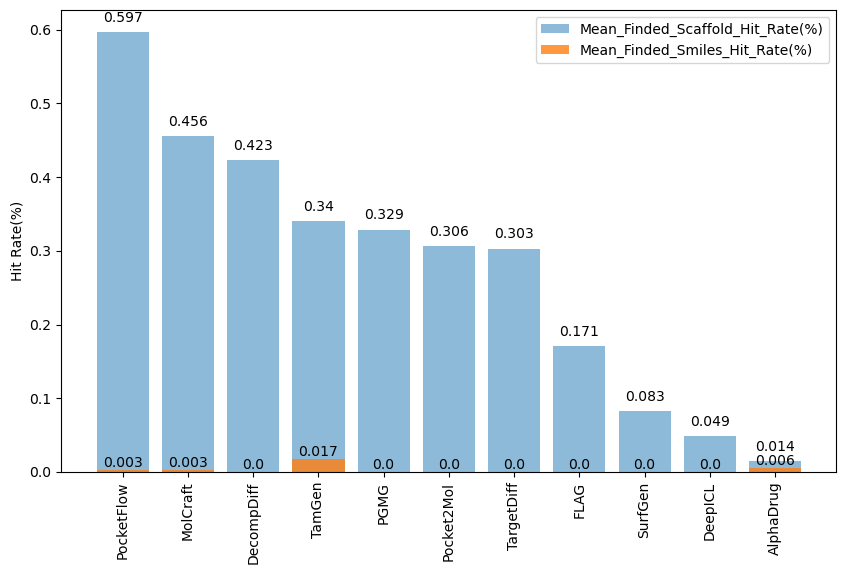

In [36]:
scaffold_molecule_pd = scaffold_deduplicated_pd.sort_values(by = 'Finded_Scaffold_Hit_Rate(%)',ascending = False)
plt.figure(figsize=(10,6))
bars1 = plt.bar(scaffold_molecule_pd['ModelName'],scaffold_molecule_pd['Finded_Scaffold_Hit_Rate(%)'],label = 'Mean_Finded_Scaffold_Hit_Rate(%)',alpha = 0.5)
bars2 = plt.bar(scaffold_molecule_pd['ModelName'],scaffold_molecule_pd['Finded_Smiles_Hit_Rate(%)'],label = 'Mean_Finded_Smiles_Hit_Rate(%)',alpha = 0.8)
# scaffold_molecule_pd[['Number_of_Finded_Scaffolds']].plot(kind = 'bar',xlabel = 'ModelName',ylabel = 'Number of Targets',label = 'Number of Finded Scaffolds')
# scaffold_molecule_pd[['Number_of_Finded_Smiles']].plot(kind = 'bar',label = 'Number of Finded Smiles')
_ = plt.xticks(range(len(scaffold_molecule_pd['ModelName'])),scaffold_molecule_pd['ModelName'],rotation = 90)
# 在柱子上添加具体数值

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,  height+0.01, f'{float(round(height,3))}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    # 小数点保留三位
    plt.text(bar.get_x() + bar.get_width() / 2, height+0.00, f'{float(round(height,3))}', ha='center', va='bottom')
plt.ylabel('Hit Rate(%)')
plt.legend()